## Nasdaq Stock data

In [1652]:
import seaborn as sns
# Plot the histogram thanks to the distplot function
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import pandas as pd

# Load the data
import plotly.express as px
dd = pd.read_csv("^IXIC.csv")


In [1653]:
date_dt=dd['Date'];
df=dd.copy();
df=df.set_index(pd.DatetimeIndex(date_dt))
df.head()

Date         Open         High          Low        Close  \
Date                                                                         
2021-01-25  25-01-2021  13681.20996  13728.98047  13368.67969  13635.99023   
2021-01-26  26-01-2021  13681.71973  13702.69043  13603.19043  13626.05957   
2021-01-27  27-01-2021  13486.58008  13538.41992  13192.91016  13270.59961   
2021-01-28  28-01-2021  13323.29004  13507.63965  13316.51953  13337.16016   
2021-01-29  29-01-2021  13284.71973  13322.00000  12985.04981  13070.69043   

              Adj Close       Volume  
Date                                  
2021-01-25  13635.99023   7193710000  
2021-01-26  13626.05957   6849600000  
2021-01-27  13270.59961  11621190000  
2021-01-28  13337.16016   9959270000  
2021-01-29  13070.69043   7872250000

In [1654]:
dd.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

## 1. Closing data of Tesla over last  years

In [1655]:
close_data=df["Close"]
df["Date"] = pd.to_datetime(df["Date"])

c1 = df[df["Date"].dt.year >= 2022]["Close"]
# c1
df["Date"]

C:\Users\RAmsh\AppData\Local\Temp\ipykernel_12400\4118295643.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


Date
2021-01-25   2021-01-25
2021-01-26   2021-01-26
2021-01-27   2021-01-27
2021-01-28   2021-01-28
2021-01-29   2021-01-29
                ...    
2024-01-16   2024-01-16
2024-01-17   2024-01-17
2024-01-18   2024-01-18
2024-01-19   2024-01-19
2024-01-22   2024-01-22
Name: Date, Length: 753, dtype: datetime64[ns]

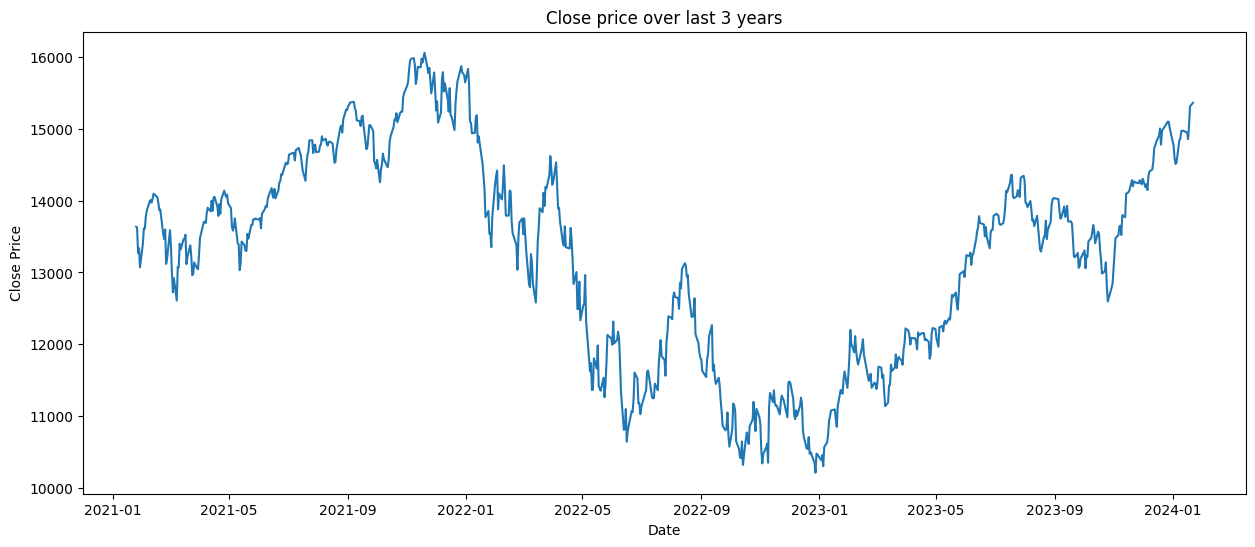

In [1656]:
plt.figure(figsize=(15,6));
plt.plot(df["Date"], df["Close"]); # dd["Close"]
plt.title("Close price over last 3 years")
plt.ylabel("Close Price")
plt.xlabel("Date")

plt.show()


## 2. Calculating 4 technical indicators

In [1657]:
dd.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

#### Moving averages help identify trends, oscillators measure momentum, volume indicators indicate market liquidity and volatility indicators highlight potential breakout opportunities.

### Moving Average

## a. Exponential moving average

In [1658]:
# Calculate the Exponential Moving average
window_size=25
df["EWA25"]=close_data.ewm(span=window_size,min_periods=window_size).mean()


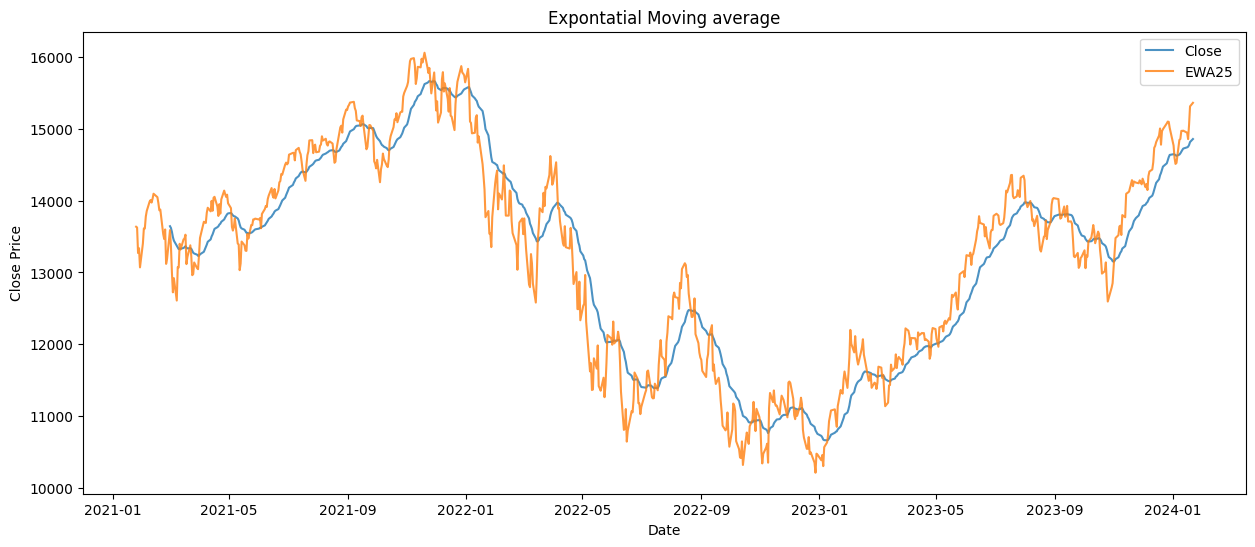

In [1659]:
# Graph of EMA 
plt.figure(figsize=(15,6));
plt.plot(df['Date'],df["EWA25"],alpha=0.8,label='Close');
plt.plot(df['Date'],df["Close"],alpha=0.8,label='EWA25');

plt.title("Expontatial Moving average")
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.legend()

plt.show()


### b. Simple Moving Average

In [1660]:
# Calculate SMA of window size 25 and 40
cl='Close'
def Moving_avg(dd,window_size,column=cl):
    return dd[column].rolling(window=window_size).mean()

df['MA25']=Moving_avg(df,25)
df['MA40']=Moving_avg(df,40)


In [1661]:
# Getting the Signal data of  when to buy and sell the data

df['Signal']=np.where(df['MA25']>df['MA40'],1,0)
df["Prediction_MA"]=np.where(df['MA25']>df['MA40'],"L","S")
#df["Pred"]=np.where(df['Combine_Indicator']>df['Ind'],"L",df["Prediction"])

df['Pos']=df['Signal'].diff()
df['Pos']
df['Buy']=np.where(df['Pos']==1,df['Close'],np.NAN)
df['Sell']=np.where(df['Pos']==-1,df['Close'],np.NAN)


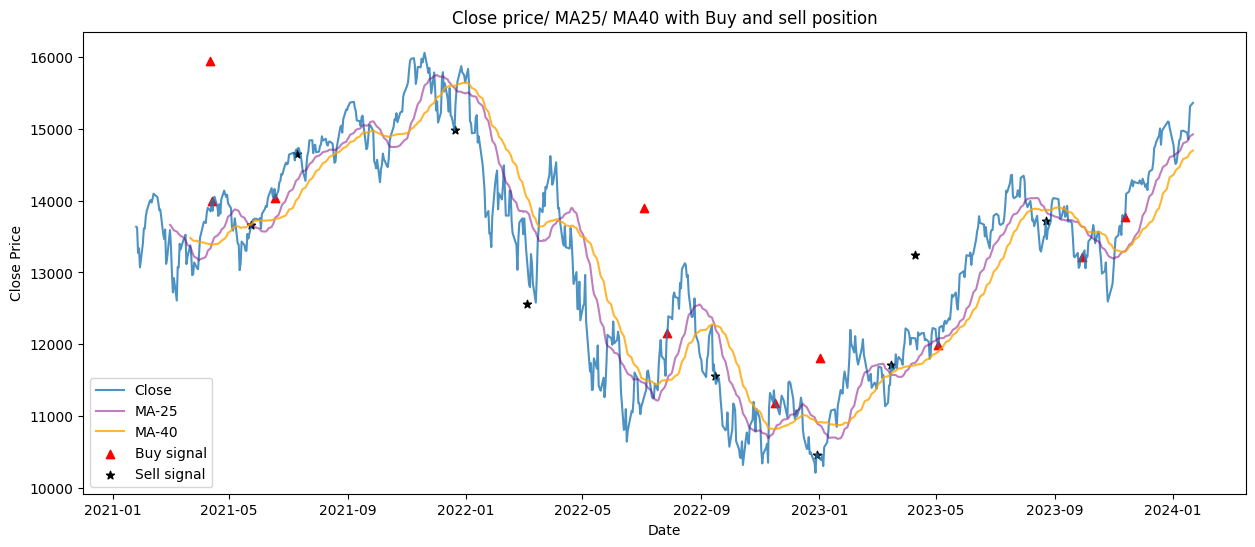

In [1662]:
# Plot of Close price/ MA25/ MA40 with Buy and sell position

plt.figure(figsize=(15,6));
plt.plot(df['Date'],df["Close"],alpha=0.8,label='Close');
plt.plot(df['Date'],df["MA25"],alpha=0.5,label='MA-25',color='Purple'); ## Purple color - Buy
plt.plot(df['Date'],df["MA40"],alpha=0.8,label='MA-40' , color='Orange'); ## Orange color - Sell
plt.scatter(df.index,df['Buy'],alpha=1,label='Buy signal',marker='^',color='Red')
plt.scatter(df.index,df['Sell'],alpha=1,label='Sell signal',marker='*',color='Black')

plt.title("Close price/ MA25/ MA40 with Buy and sell position")
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.legend()
plt.show()


### c. RSI - Relative Strength Index
##### A momentum oscillator that measures the speed and change of price movements 

##### Oversold : price is lower than its fair or intrinsic value.
##### Overbought : when an asset's trading value is above its fair or intrinsic value.

In [1663]:
# Determing the gain and loss made by difference between close value and open value
# Loss Case
def Gain(data):
    lp=[]
    for i in range(df.shape[0]):
        g=df['Close'][i]-df['Open'][i]
        if(g>0):
            lp.append(g)
        else:
            lp.append(0)
    return lp

df["Gain"]=Gain(df)
# df["Gain"]

# Loss Case
def Loss(data):
    lp=[]
    for i in range(df.shape[0]):
        g=df['Close'][i]-df['Open'][i]
        if(g<0):
            lp.append(-1*g)
        else:
            lp.append(0)
    return lp

df["Loss"]=Loss(df)
# df["Loss"]


C:\Users\RAmsh\AppData\Local\Temp\ipykernel_12400\3820559166.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  g=df['Close'][i]-df['Open'][i]
C:\Users\RAmsh\AppData\Local\Temp\ipykernel_12400\3820559166.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  g=df['Close'][i]-df['Open'][i]


In [1664]:
# Calculating average gain and average loss and getting relative Strength data 
cl='Gain'
def Moving_avg(dd,window_size,cl):
    return dd[cl].rolling(window=window_size).mean()

df['MA_gain']=Moving_avg(df,25, 'Gain')

cl='Loss'
def Moving_avg(dd,window_size,column=cl):
    return dd[column].rolling(window=window_size).mean()

df['MA_loss']=Moving_avg(df,25)

# Average calculating formula
cl='Loss'
def Moving_avg(dd,window_size,column=cl):
    return dd[column].rolling(window=window_size).mean()

# Relative Strength by diving average gain with average loss
df['rel_RSI']=df['MA_gain']/df['MA_loss']

# Final RSI value 
df["RSI25"]=(100-(100/(df["rel_RSI"]+1)))

In [1665]:
# RSI value for the data is 50, neutral not bullish or bearish
val_RSI=df["RSI25"].sum()/df.shape[0]
val_RSI

50.67240018144603

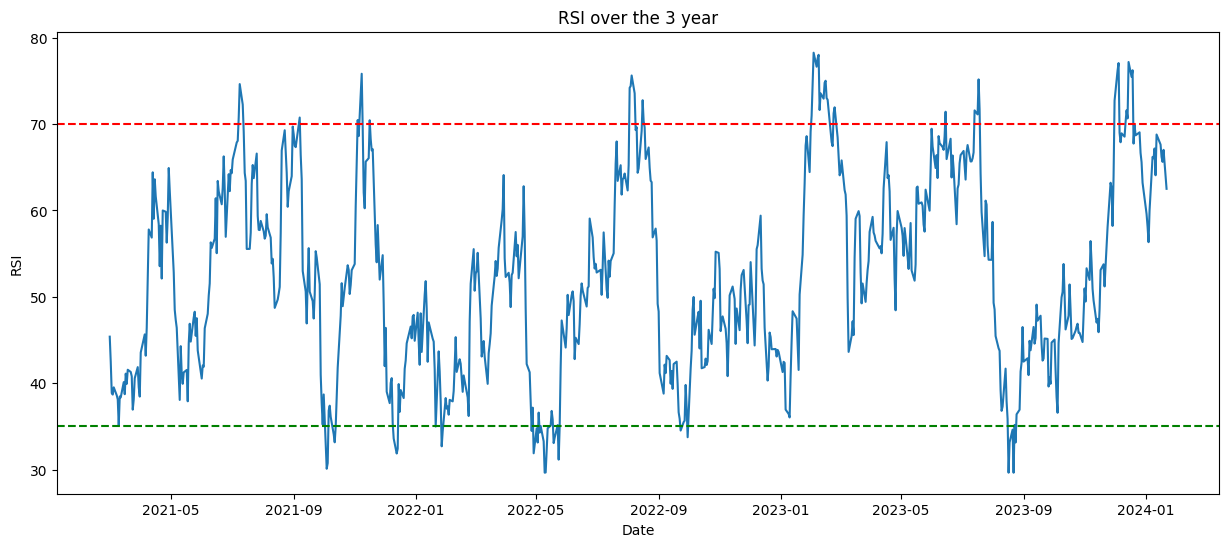

In [1666]:
plt.figure(figsize=(15,6));
plt.plot(df["Date"], df["RSI25"],label="RSI"); 
plt.title("RSI over the 3 year")
plt.ylabel("RSI")
plt.xlabel("Date")

oversold_value=35
overbought_value=70
plt.axhline(y=oversold_value, color='g', linestyle='--', label='Horizontal Line at y={oversold_value}')
plt.axhline(y=overbought_value, color='r', linestyle='--', label='Horizontal Line at y={overbought_value}')

plt.show()


### d. MACD - Moving Average Convergence Divergence
##### Defination : It combines two moving averages, a faster and a slower one, to identify potential trend reversals and generate buy or sell signals.

In [1667]:
# created new dataframe
new_macd=pd.DataFrame(columns=["Date","EWA26","EWA12","MACDfast","MACDlow_10","Signal_macd","Strategy_return"])



In [1668]:
# Calculating MACD

window_size=40
df["EWA40"]=close_data.ewm(span=window_size,min_periods=window_size).mean()

# getting Line MACD = (12-day EMA - 26-day EMA)
new_macd["EWA26"]=close_data.ewm(span=26,min_periods=26).mean()
new_macd["EWA12"]=close_data.ewm(span=12,min_periods=12).mean()
df["MACDfast"]=new_macd["EWA12"]-new_macd["EWA26"]

# Finding the average of the line MACD over a span of 9 day EMA
df["MACDlow_10"]=df["MACDfast"].ewm(span=9).mean()
# copy pasting the data in new_macd
new_macd["MACDfast"]=df["MACDfast"]
new_macd["MACDlow_10"]=df["MACDlow_10"]
new_macd["Date"]=df["Date"]



#### Here In the below graph if EWA12 is above EWA26 then MACD is a positive value and if EWA12 value below EWA26 then MACD is a negative value.

Here EWA12 -> is EWA of 12 period
and EWA26 -> is EWA of 26 period

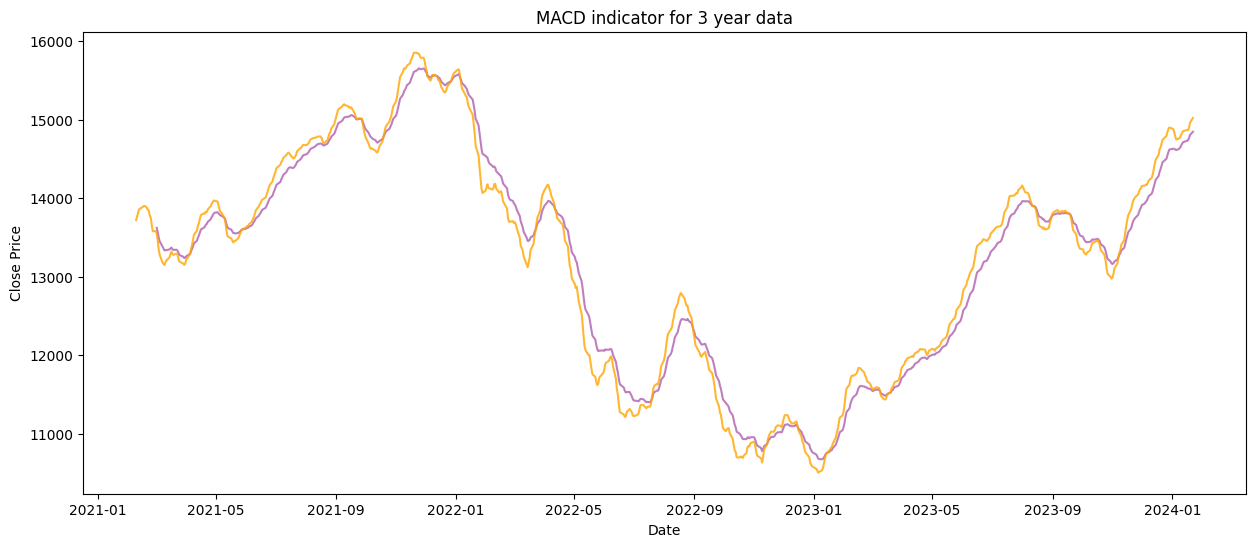

In [1669]:
plt.figure(figsize=(15,6));
plt.plot(new_macd['Date'],new_macd["EWA26"],alpha=0.5,label='MA-25',color='Purple'); ## Purple color - EWA 26
plt.plot(new_macd['Date'],new_macd["EWA12"],alpha=0.8,label='MA-40' , color='Orange'); ## Orange color - EWA 12

plt.title("MACD indicator for 3 year data")
plt.ylabel("Close Price")
plt.xlabel("Date")

plt.show()


####  level of distance that MACD is above or below the  baseline (at 0) indicates that the distance between EWA12 and EWA26 is growing.

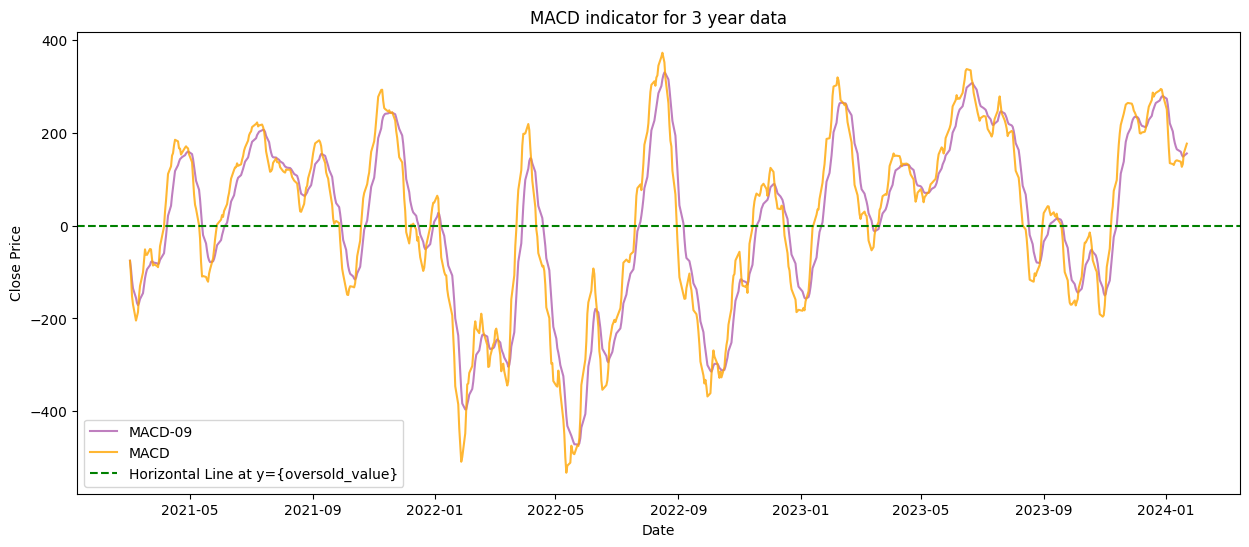

In [1670]:
plt.figure(figsize=(15,6));
plt.plot(df['Date'],df["MACDlow_10"],alpha=0.5,label='MACD-09',color='Purple'); ## Purple color - MACD_low
plt.plot(df['Date'],df["MACDfast"],alpha=0.8,label='MACD' , color='Orange'); ## Orange color - MACDfast
plt.axhline(y=0, color='g', linestyle='--', label='Horizontal Line at y={oversold_value}')


plt.title("MACD indicator for 3 year data")
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.legend()

plt.show()


In [1671]:
df['Date']

Date
2021-01-25   2021-01-25
2021-01-26   2021-01-26
2021-01-27   2021-01-27
2021-01-28   2021-01-28
2021-01-29   2021-01-29
                ...    
2024-01-16   2024-01-16
2024-01-17   2024-01-17
2024-01-18   2024-01-18
2024-01-19   2024-01-19
2024-01-22   2024-01-22
Name: Date, Length: 753, dtype: datetime64[ns]

##### if MACDfast line is above MACDlow_10 then to -> Buy
##### if MACDfast line is bwlow MACDlow_10 then to -> Sell

In [1672]:
# Determing the signal value to buy or sell
df['Signal_macd']=np.where(df['MACDfast']>df['MACDlow_10'],1,0)
df['Signal_macd']=np.where(df['MACDfast']<df['MACDlow_10'],-1,df['Signal_macd'])
df["pred_MACD"]=np.where(df['MACDfast']>df['MACDlow_10'],"L","S")
df["Prediction_MACD"]=np.where(df['MACDfast']<df['MACDlow_10'],"L",df["pred_MACD"])
new_macd["Signal_macd"]=df["Signal_macd"]
df['Signal_macd']

# the buy the the sell position determinned from entry column
new_macd["entry"]=new_macd["Signal_macd"].diff()
new_macd["entry"].value_counts()

entry
 0.0    702
 2.0     25
-2.0     24
-1.0      1
Name: count, dtype: int64

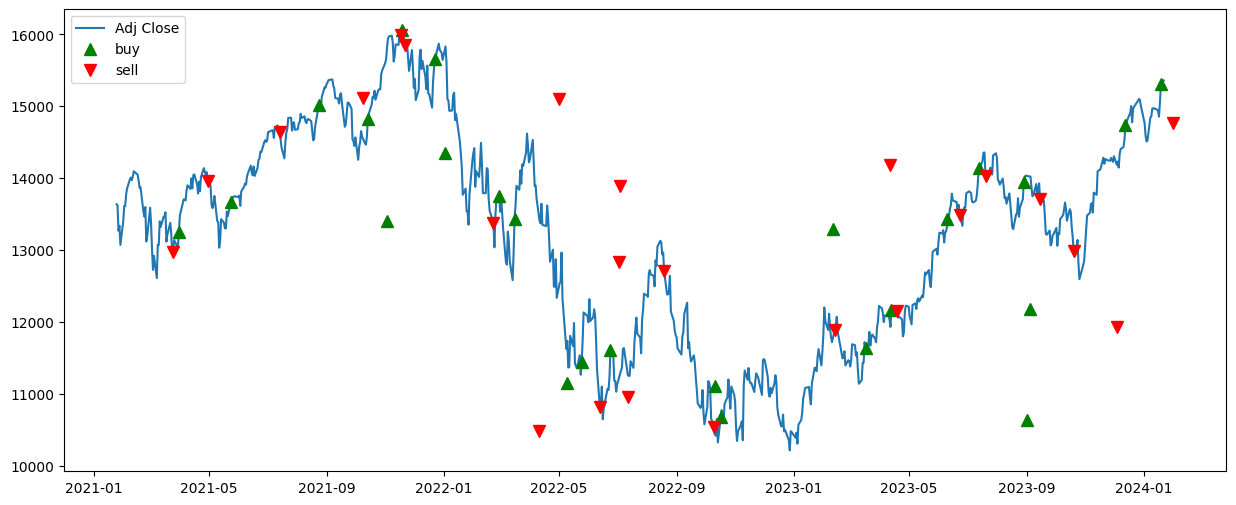

In [1673]:
## Plot graph of buy and sell
plt.figure(figsize=(15,6));
plt.plot(new_macd["Date"],df['Close'], label = 'Adj Close')

plt.plot(new_macd[new_macd.entry == 2].index, df['Adj Close'][new_macd.entry == 2], '^', color = 'g', markersize = 8,label='buy')
plt.plot(new_macd[new_macd.entry == -2].index, df['Adj Close'][new_macd.entry == -2], 'v',color = 'r', markersize = 8,label='sell')
plt.legend()
plt.show()

## e. Bollinger Bands

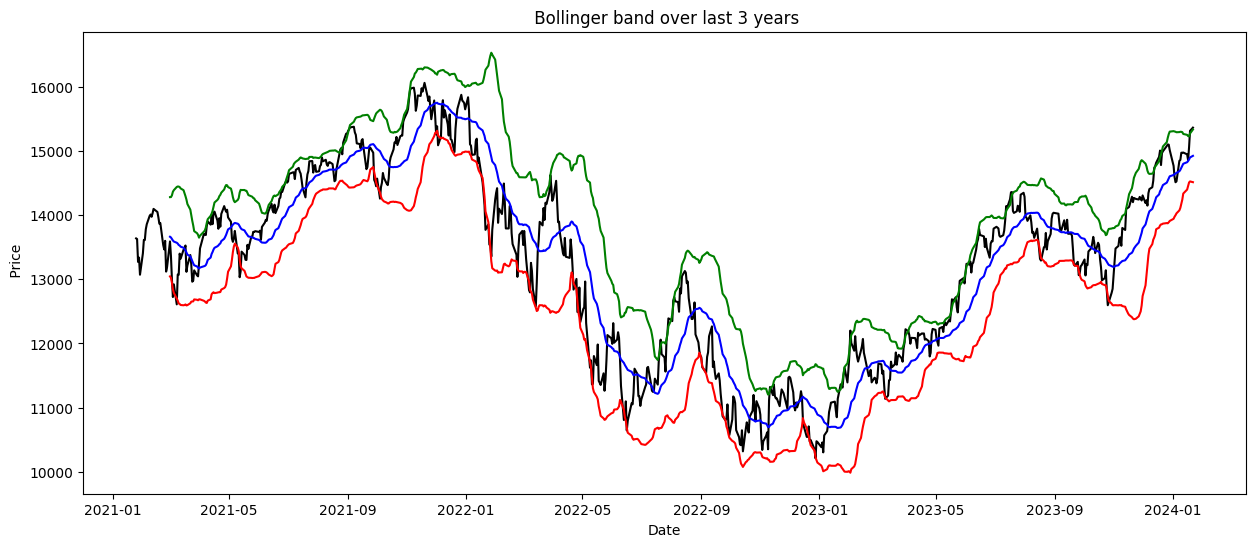

In [1674]:
period=25
# simple moving average 
df["MA25"]
# standard deviation give volatility
df["STD25"]=df["Close"].rolling(window=period).std()
# upper Bollinger band
df["Upper_BD"]=df["MA25"]+df["STD25"]*2
# lower Bollinger band
df["Lower_BD"]=df["MA25"]-df["STD25"]*2
# plot the graph
col=["close","ma25","Upper_BD","Lower_BD"]
plt.figure(figsize=(15,6));
plt.plot(df["Date"], df["Close"], label="Close", color='black')
plt.plot(df["Date"], df["MA25"], label="MA25", color='blue')
plt.plot(df["Date"], df["Upper_BD"], label="Upper Bollinger", color='green')
plt.plot(df["Date"], df["Lower_BD"], label="Lower Bollinger", color='red')

plt.title(" Bollinger band over last 3 years")
plt.ylabel(" Price")
plt.xlabel("Date")

plt.show()



In [1675]:
new_BD=pd.DataFrame(columns=["Date","Close","MA25","STD25","Upper_BD","Lower_BD","Buy_BD","Sell_BD"]);
new_BD['Date']=df.Date
new_BD["MA25"]=df["MA25"]
new_BD["Close"]=df["Close"]
# standard deviation
new_BD["STD25"]=df["STD25"]
# upper Bollinger band
new_BD["Upper_BD"]=df["Upper_BD"]
# lower Bollinger band
new_BD["Lower_BD"]=df["Lower_BD"]

# Determining the signal and buy and sell positions
def Signal_adding(data):
    buy=[]
    lp=[]
    f=""
    sell=[]
    # lp is acting like flag to know if its still in buying line or selling
    for i in range(0,data.shape[0]):
        if(data["Close"][i]>data["Upper_BD"][i]):
            buy.append(np.nan)
            f="b"
            lp.append("L")
            sell.append(data["Close"][i])
            
           
        elif(data["Close"][i]<data["Lower_BD"][i]):
            sell.append(np.nan)
            f="s"
            lp.append("S")
            buy.append(data["Close"][i])
        else:
            if(f=="b"):
                
               lp.append("L")
            else:
                lp.append("S")
            buy.append(np.nan)
            sell.append(np.nan)
    print(buy)
    return(buy,sell,lp)

            
new_BD['Buy_BD']=Signal_adding(new_BD)[0]
new_BD['Sell_BD']=Signal_adding(new_BD)[1]
df["Prediction_BD"]=Signal_adding(new_BD)[2]


C:\Users\RAmsh\AppData\Local\Temp\ipykernel_12400\549517608.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(data["Close"][i]>data["Upper_BD"][i]):
C:\Users\RAmsh\AppData\Local\Temp\ipykernel_12400\549517608.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif(data["Close"][i]<data["Lower_BD"][i]):
C:\Users\RAmsh\AppData\Local\Temp\ipykernel_12400\549517608.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  buy.append(

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 12723.46973, nan, 12609.16016, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 13401.86035, 13389.42969, 13031.67969, 13124.99023, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 14546.67969, 14512.44043, 14448.58008, nan, 14255.48047, nan, nan, nan, nan, nan, nan, nan, nan,

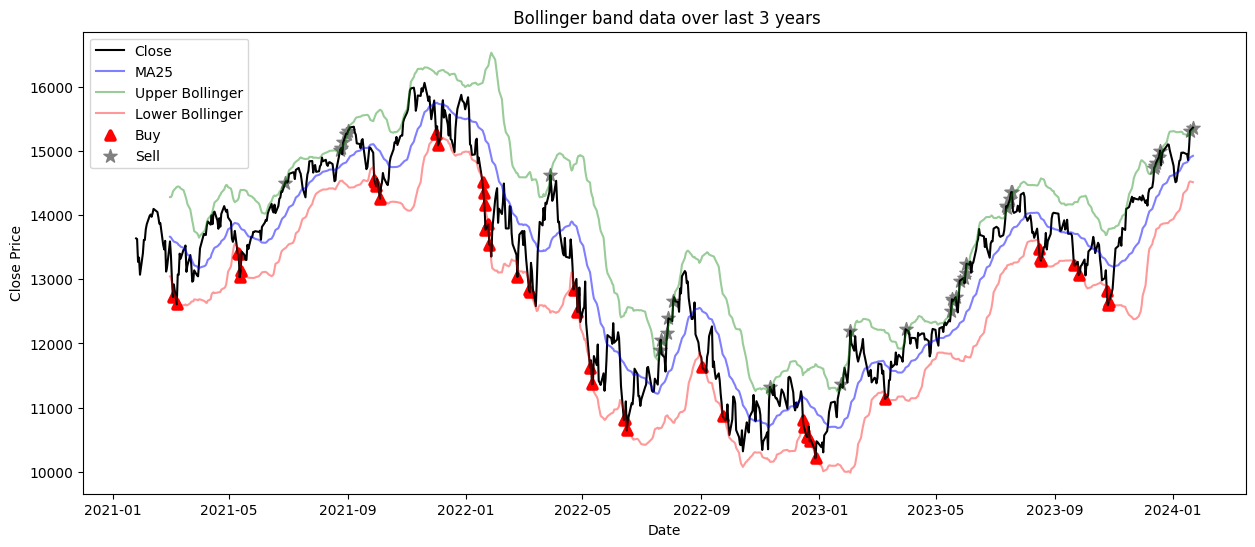

In [1676]:

plt.figure(figsize=(15,6));
plt.plot(new_BD["Date"], new_BD["Close"], label="Close", color='black')
plt.plot(new_BD["Date"], new_BD["MA25"], label="MA25", color='blue',  alpha=0.5)
plt.plot(new_BD["Date"], new_BD["Upper_BD"], label="Upper Bollinger", color='green', alpha=0.4)
plt.plot(new_BD["Date"], new_BD["Lower_BD"], label="Lower Bollinger", color='red', alpha=0.4)
plt.scatter(new_BD['Date'], new_BD['Buy_BD'], color='Red', lw=3, marker='^', label="Buy")
plt.scatter(new_BD['Date'], new_BD['Sell_BD'], color='Grey', s=100, marker='*', label="Sell")
plt.title(" Bollinger band data over last 3 years")
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.legend()
plt.show()



### f. Negative volume Index
##### - Measures the volatility of the financial market

#### Buy when the NVI line above Moving average line (MA)
#### Sell when the NVI line below Moving average line (MA)

C:\Users\RAmsh\AppData\Local\Temp\ipykernel_12400\494609243.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("hh : ",data['nvi'][0])
C:\Users\RAmsh\AppData\Local\Temp\ipykernel_12400\494609243.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prev_nvi = data['nvi'][i-1]
C:\Users\RAmsh\AppData\Local\Temp\ipykernel_12400\494609243.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prev_close = data[close_col][i-1]
C:\User

hh :  0.0


Text(0.5, 0, 'Date')

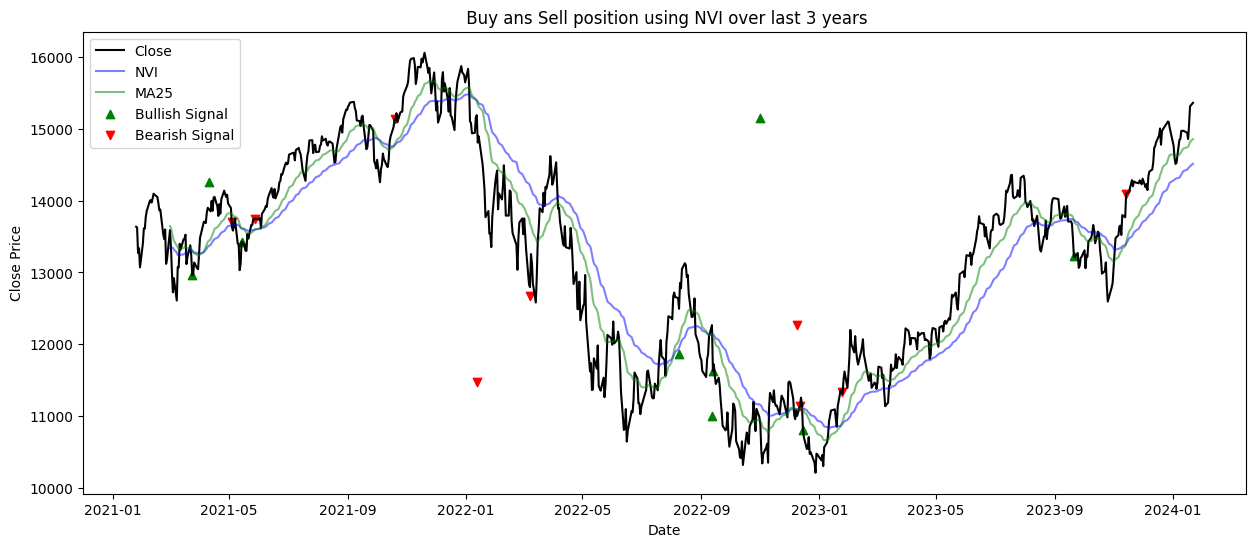

In [1677]:
# finding nvi The cumulative Negative Volume Index (NVI) is calculated by adding 
# the product of the percentage change in the closing price from the previous day and the previous day's NVI to the existing NVI value
def negative_volume_index(data, periods, close_col, vol_col):
    data['nvi'] = 0.
    #prev_nvi=0;
    print("hh : ",data['nvi'][0])
    for i in range(1, len(data)):
        prev_nvi = data['nvi'][i-1]
        
        prev_close = data[close_col][i-1]

        if data[vol_col][i] < data[vol_col][i-1]:
            nvi = prev_nvi + (data[close_col][i] - prev_close / prev_close * prev_nvi)
        else:
            nvi = prev_nvi

        data['nvi'][i] = nvi

    data['nvi_ema'] = data['nvi'].ewm(ignore_na=False, min_periods=25, com=periods, adjust=True).mean()

    return data

negative_volume_index(df, 25, 'Close', 'Volume')


# finding the buy and sell positions using nvi indicator
df['Signal_3']=np.where(df['nvi_ema']>df['EWA25'],1,0)
df['Signal_nvi']=np.where(df['nvi_ema']<df['EWA25'],-1,df['Signal_3'])

# encoding buy signal by "L" and sell by "S"
if 'Prediction_nvi' not in df.columns:
    df['Prediction_nvi'] = np.nan

for i in range(df["Signal_nvi"].shape[0]):
    if df["Signal_nvi"][i] == 0 or df["Signal_nvi"][i] == 1:
        df["Prediction_nvi"][i] = "S"
    else:
        df["Prediction_nvi"][i] = "L"
        


# df["pred_nvi"]=np.where(df['nvi_ema']>df['EWA25'],"L","S")
# df["Prediction_nvi"]=np.where(df['nvi_ema']>df['EWA25'],"L",df["pred_nvi"])

df["entry_nvi"]=df["Signal_nvi"].diff()
df["entry_nvi"].value_counts()

# plot the graph using NVI indicator
plt.figure(figsize=(15,6));
plt.plot(df["Date"], df["Close"], label="Close", color='black')
plt.plot(df["Date"], df["nvi_ema"], label="NVI", color='blue',  alpha=0.5)
plt.plot(df["Date"], df["EWA25"], label="MA25", color='green',  alpha=0.5)
plt.scatter(df.index[df['entry_nvi'] == 2], df['Close'][df['entry_nvi'] == 2], label='Bullish Signal', color='green', marker='^')
plt.scatter(df.index[df['entry_nvi'] == -2], df['Close'][df['entry_nvi'] == -2], label='Bearish Signal', color='red', marker='v')

plt.title(" Buy ans Sell position using NVI over last 3 years")
plt.ylabel("Close Price")
plt.legend()
plt.xlabel("Date")

## 4. Correlations

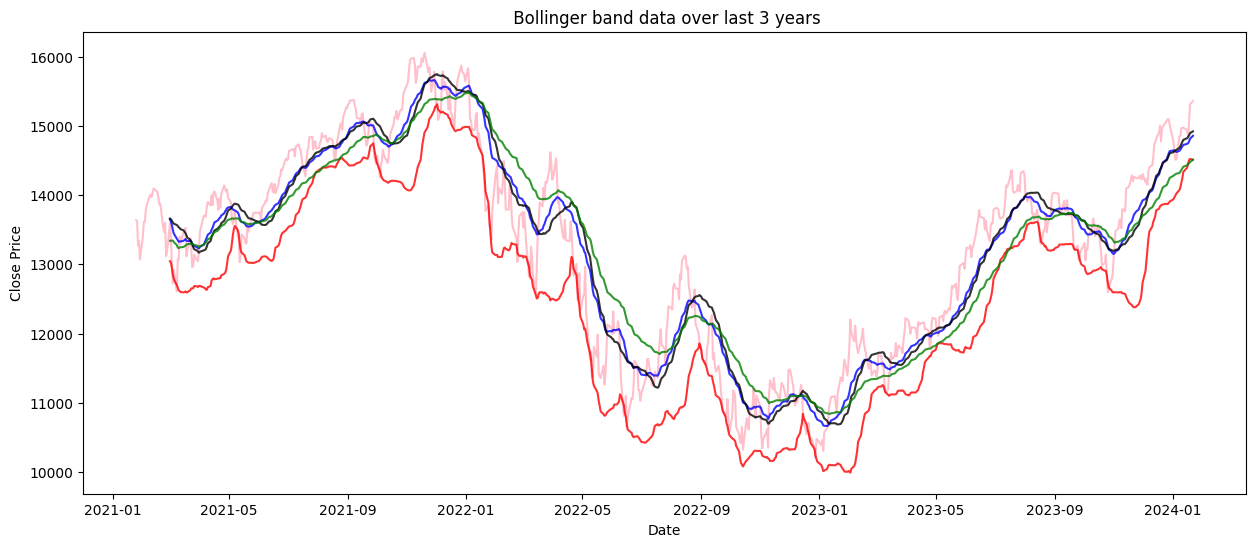

In [1678]:

## Below are the technical indicators taken for anlysis
df["MA25"]
df["RSI25"]
df["MACDfast"]
df["EWA25"]
df["Upper_BD"]


plt.figure(figsize=(15,6));
plt.plot(df["Date"], df["Close"], label="Close", color='pink')
plt.plot(df["Date"], df["EWA25"], label="MA25", color='blue',  alpha=0.8)
plt.plot(df["Date"], df["MA25"], label="Upper Bollinger", color='black', alpha=0.8)
plt.plot(df["Date"], df["Lower_BD"], label="Lower Bollinger", color='red', alpha=0.8)
plt.plot(df["Date"], df["nvi_ema"], label="Lower Bollinger", color='green', alpha=0.8)
plt.title(" Bollinger band data over last 3 years")
plt.ylabel("Close Price")
plt.xlabel("Date")

plt.show()




In [1679]:
correlation_matrix = df[['MA25', 'MACDfast', 'Lower_BD', 'nvi_ema', "RSI25"]].corr()
print("correlation_matrix :\n",correlation_matrix)

correlation_matrix :
               MA25  MACDfast  Lower_BD   nvi_ema     RSI25
MA25      1.000000  0.120279  0.983289  0.981917 -0.053206
MACDfast  0.120279  1.000000  0.186581  0.006872  0.787061
Lower_BD  0.983289  0.186581  1.000000  0.949663 -0.016758
nvi_ema   0.981917  0.006872  0.949663  1.000000 -0.125938
RSI25    -0.053206  0.787061 -0.016758 -0.125938  1.000000


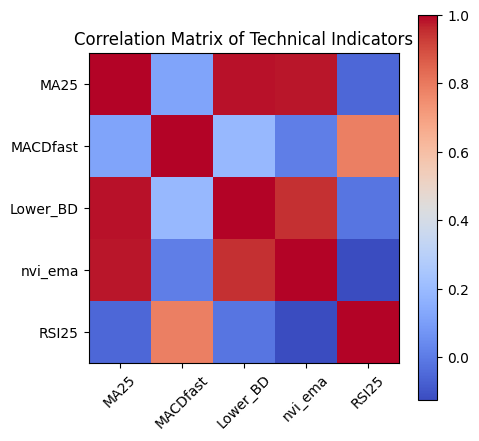

In [1680]:
plt.figure(figsize=(5, 5))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix of Technical Indicators')
plt.show()

## 5. Combined Indicator
##### a combined indicator -> is the weighted average of all the picked

In [1681]:
weights1 = correlation_matrix['MA25'].abs() / correlation_matrix['MA25'].abs().sum()
weights1.sort_values()

weights2 = correlation_matrix['nvi_ema'].abs() / correlation_matrix['nvi_ema'].abs().sum()
weights2.sort_values()

weights3 = correlation_matrix['MACDfast'].abs() / correlation_matrix['MACDfast'].abs().sum()
weights3.sort_values()

weights4 = correlation_matrix['Lower_BD'].abs() / correlation_matrix['Lower_BD'].abs().sum()
weights4.sort_values()



RSI25       0.005343
MACDfast    0.059491
nvi_ema     0.302798
MA25        0.313520
Lower_BD    0.318848
Name: Lower_BD, dtype: float64

In [1682]:
v1=weights1["MA25"]+weights2["MA25"]+weights3["MA25"]+weights4["MA25"]
v2=weights1["nvi_ema"]+weights2["nvi_ema"]+weights3["nvi_ema"]+weights4["nvi_ema"]
v3=weights1["MACDfast"]+weights2["MACDfast"]+weights3["MACDfast"]+weights4["MACDfast"]
v4=weights1["Lower_BD"]+weights2["Lower_BD"]+weights3["Lower_BD"]+weights4["Lower_BD"]
print("MA25 : ",v1)
print("EWA25 : ",v2)
print("MACDfast : ",v3)
print("Upper_BD : ",v4)


MA25 :  1.0098060340982382
EWA25 :  0.9452413783825366
MACDfast :  0.5760656680821391
Upper_BD :  1.0308453496829315


#### --> From above we can infer that "EWA25" is giving good correlation value with all other indicator, then is "MA25" , then "upper_BD" then "MACDfase". In this order we will assign the weights to the indicator

#### Generally those with high correlation have more weight

In [1683]:

total_weight = v1 + v2 + v3 + v4

weight_MA25 = v1 / total_weight
weight_nvi_ema = v2 / total_weight
weight_MACDfast = v3 / total_weight
#weight_RSI25=v3/total_weight
weight_Upper_BD = v4 / total_weight

print("Normalized Weights:")
print("MA25: ", weight_MA25)
print("nvi_ema: ",   weight_nvi_ema)
print("MACDfast: ",weight_MACDfast)
print("Upper_BD: ",weight_Upper_BD)


Normalized Weights:
MA25:  0.28349742252004373
nvi_ema:  0.26537125485692326
MACDfast:  0.1617272293776823
Upper_BD:  0.2894040932453506


In [1684]:
# Weighted Average forrmula
df['Combine_Indicator'] = (
    weight_MA25 * df['MA25'] +
    weight_nvi_ema * df['nvi_ema'] +
    weight_Upper_BD * df['Lower_BD'] +
    weight_MACDfast * df['MACDfast']
)
print("Combied Indicator :")
df['Combine_Indicator']



Combied Indicator :


Date
2021-01-25             NaN
2021-01-26             NaN
2021-01-27             NaN
2021-01-28             NaN
2021-01-29             NaN
                  ...     
2024-01-16    12220.116495
2024-01-17    12243.789446
2024-01-18    12271.925978
2024-01-19    12293.293090
2024-01-22    12309.300554
Name: Combine_Indicator, Length: 753, dtype: float64

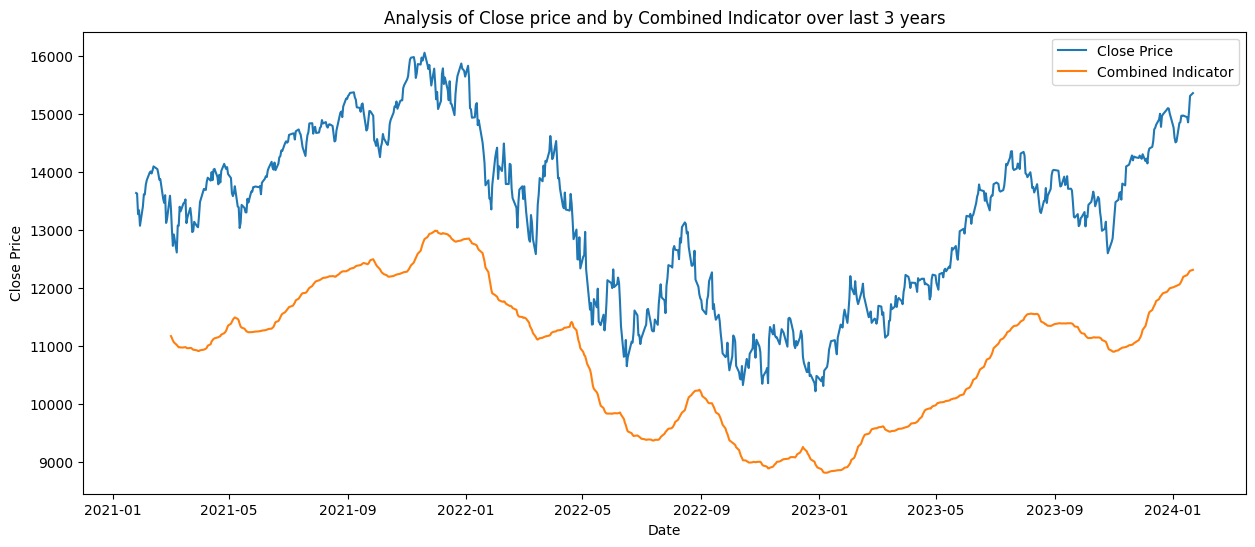

In [1685]:
# plot combined indicator and close value
plt.figure(figsize=(15,6));
plt.plot(df["Date"], df["Close"] ,label="Close Price"); # dd["Close"]
plt.plot(df["Date"], df["Combine_Indicator"], label="Combined Indicator"); # dd["Close"]

plt.title("Analysis of Close price and by Combined Indicator over last 3 years")
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.legend()
plt.show()


## 6. Predict bullish and bearish positions on each time-stamp.

In [1686]:
df["Ind"]=df["Combine_Indicator"].ewm(span=25).mean()
df['Signal_CI']=np.where(df['Combine_Indicator']>df['Ind'],1,0)
df['Signal_final']=np.where(df['Combine_Indicator']<df['Ind'],-1,df['Signal_CI'])
df["Prediction"]=np.where(df['Combine_Indicator']>df['Ind'],0,"S")
df["Pred_final"]=np.where(df['Combine_Indicator']>df['Ind'],"L",df["Prediction"])
#new_macd["Signal_macd"]=df["Signal_macd"]
df['Signal_final']

df["entry_CI"]=df["Signal_final"].diff()
df["entry_CI"].value_counts()

entry_CI
 0.0    732
 2.0     10
-2.0      9
-1.0      1
Name: count, dtype: int64

In [1687]:
df['Pred_final'].value_counts()
pred_array = df['Pred_final'].to_numpy()
#dd["Prediction"]=df['Pred_final'].astype(str)
pred_array

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'L',
       'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L', 'L', 'S', 'S', 'S', 'S', 'S', 'S

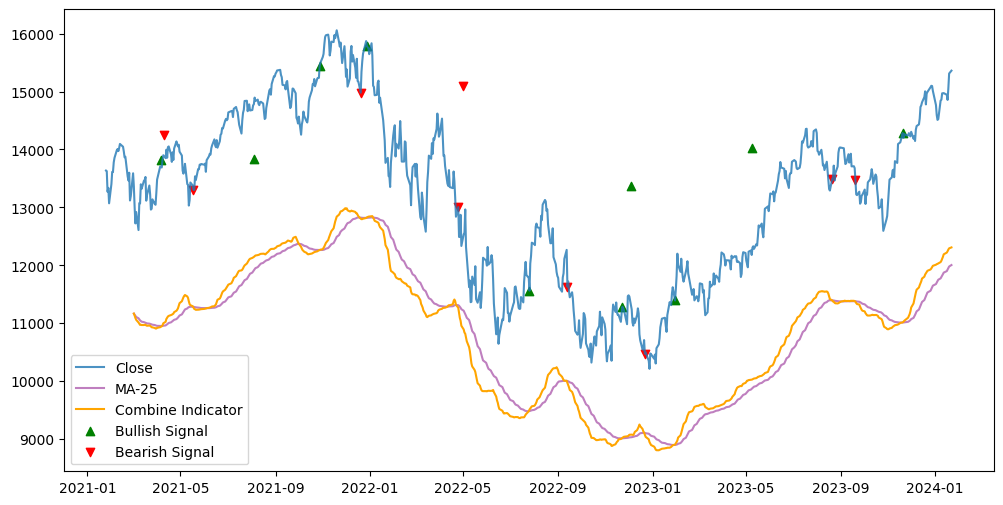

In [1688]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'],df["Close"],alpha=0.8,label='Close');
#plt.plot(df['Date'],df["Combine_Indicator"],alpha=0.5,label='MA-25',color='Purple'); 
plt.plot(df['Date'],df["Ind"],alpha=0.5,label='MA-25',color='Purple'); 
plt.plot(df.Date, df['Combine_Indicator'], label='Combine Indicator', color='orange')
plt.scatter(df.index[df['entry_CI'] == 2], df['Close'][df['entry_CI'] == 2], label='Bullish Signal', color='green', marker='^') # buy
plt.scatter(df.index[df['entry_CI'] == -2], df['Close'][df['entry_CI'] == -2], label='Bearish Signal', color='red', marker='v') # sell

plt.legend()
plt.show()

## 7. Predict Accuracy

In [1689]:
accdt=pd.DataFrame(columns=["Prediction_MA","Prediction_BD","Prediction_MACD","Prediction_nvi","Pred_final"])

accdt["Prediction_MA"]=df["Prediction_MA"]
accdt["Prediction_BD"]=df["Prediction_BD"]
accdt["Prediction_MACD"]=df["Prediction_MACD"]
accdt["Prediction_nvi"]=df["Prediction_nvi"]
accdt["Pred_final"]=df["Pred_final"]

In [1690]:
from sklearn.metrics import accuracy_score

def calculate_accuracy(predictions, actual):
    return accuracy_score(predictions, actual)

accdt["Actual"] = df["Pred_final"].astype(str)  # Convert to string assuming "Pred_final" is a numeric column

columns_to_predict = ["Prediction_MA", "Prediction_BD", "Prediction_MACD", "Prediction_nvi", "Pred_final"]
c = 0
for col in columns_to_predict:
    accuracy = calculate_accuracy(df[col].astype(str), df["Pred_final"].astype(str))
    print(f"Accuracy for {col}: {accuracy}")
    c += accuracy

average_accuracy = c / len(columns_to_predict)
average_accuracy


Accuracy for Prediction_MA: 0.8791500664010624
Accuracy for Prediction_BD: 0.7689243027888446
Accuracy for Prediction_MACD: 0.5776892430278885
Accuracy for Prediction_nvi: 0.8831341301460823
Accuracy for Pred_final: 1.0


0.8217795484727756

In [1691]:
df["Pred_final"]

Date
2021-01-25    S
2021-01-26    S
2021-01-27    S
2021-01-28    S
2021-01-29    S
             ..
2024-01-16    L
2024-01-17    L
2024-01-18    L
2024-01-19    L
2024-01-22    L
Name: Pred_final, Length: 753, dtype: object

In [1692]:
## Adding new column to csv file the prediction column

# import pandas as pd
# # Read the original CSV file
# csv_input = pd.read_csv('^IXIC.csv')

# if 'Pred_final' in df.columns and df['Pred_final'].dtype == 'O':

#     if df['Pred_final'].isnull().sum() == 0:
#         csv_input.reset_index(drop=True, inplace=True)
#         df.reset_index(drop=True, inplace=True)
#         csv_input['Prediction'] = df['Pred_final']
#         csv_input.to_csv('output1.csv', index=False)
#     else:
#         print("value missing, please check.")
# else:
#     print("Error Please check.")

# csv_input